In [1]:
from tomography import maxlike, Wigner_fock
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [5]:
def pca(time_array):
    time_array = time_array - np.average(time_array)
    mat = time_array.T.dot(time_array)
    w,v = np.linalg.eigh(mat)
    return w[::-1], v[:,::-1]

def plot_bar3d_rho(rho):
    fig = plt.figure(figsize=(6, 3))
    ax1 = fig.add_subplot(121, projection='3d')
    X,Y = np.meshgrid(np.arange(rho.shape[0]), np.arange(rho.shape[1]))
    x,y,z = X.ravel(), Y.ravel(), np.zeros(X.size)

    dx,dy,dz_re = np.ones(X.size),np.ones(Y.size),np.real(rho).ravel()
    ax1.bar3d(x,y,z,dx,dy,dz_re)
    ax1.set_zlabel('Density matrix (real)')
    ax1.set_zlim(-1, 1)
    ax1.view_init(elev=10, azim=-60)

    ax2 = fig.add_subplot(122, projection='3d')
    dx,dy,dz_im = np.ones(X.size),np.ones(Y.size),np.imag(rho).ravel()
    ax2.bar3d(x,y,z,dx,dy,dz_im)
    ax2.set_zlabel("Density matrix (imag)")
    ax2.set_zlim(-1,1)
    ax2.view_init(elev=10, azim=-60)
    
def plot_wigner_rho(rho):
    w_pp = Wigner_fock(rho.shape[0]-1, 5, 0.01)
    x = np.linspace(-5, 5, 101)
    X,Y = np.meshgrid(x, x)
    wigner = w_pp.wigner_rho(rho, X, Y)
    f = plt.figure(figsize=(5,5))
    ax_3d = f.add_subplot(111, projection='3d')
#    ax_3d.plot_surface(X, Y, wigner)
    surf = ax_3d.plot_surface(X, Y, wigner.real, cmap=cm.bwr, linewidth=0, antialiased=False)
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('P')
    ax_3d.view_init(elev=90, azim=-90)
    f.colorbar(surf, shrink=0.5, aspect=5)
    return f, ax_3d

(70000, 15, 15)
projection operator prepared
0 0.0932111795569769
1 0.024937758662009386
2 0.005779717689800742
3 0.0022144845240750733
4 0.001046642123564403
5 0.0005474745899274336
6 0.00030827392794778114
7 0.00018428876546697882
8 0.00011576458515828326
9 7.572310740444442e-05
10 5.124203828250397e-05
11 3.571389381134534e-05
12 2.5554454220441844e-05
13 1.8724235055168206e-05
14 1.4019006353700141e-05
15 1.070552543965329e-05
16 8.325103006206079e-06
17 6.583618712868952e-06
18 5.288171198610012e-06
19 4.309600680507741e-06
20 3.559788099902751e-06
21 2.97757450949841e-06
22 2.5198430572270872e-06
23 2.1557542720754273e-06
24 1.862953431000601e-06
25 1.625032601830002e-06
26 1.4298070841116164e-06
27 1.268128155788781e-06
28 1.1330549095168655e-06
29 1.0192694777180257e-06
30 9.22659527642724e-07
31 8.400169432921636e-07
32 7.688181750745019e-07
33 7.07062548835707e-07
34 6.531521423680264e-07
35 6.058017420819204e-07
36 5.639707748842722e-07
37 5.268114307743268e-07
38 4.93628818

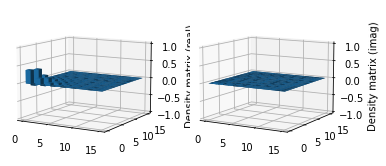

wavefunc instantiation end


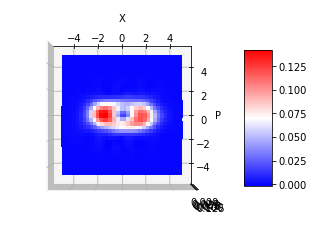

wavefunc instantiation end
negativity (0.007124050698886477+0j)


In [6]:
#Tomography
quadratures = []
phases = []

q_files = """20220901_091403hd_one-1.5uW-HWP5deg-6ps-0deg.txt
20220901_091459hd_one-1.5uW-HWP5deg-6ps-15deg.txt
20220901_091538hd_one-1.5uW-HWP5deg-6ps-30deg.txt
20220901_091614hd_one-1.5uW-HWP5deg-6ps-45deg.txt
20220901_091652hd_one-1.5uW-HWP5deg-6ps-60deg.txt
20220901_091731hd_one-1.5uW-HWP5deg-6ps-75deg.txt
20220901_091809hd_one-1.5uW-HWP5deg-6ps-90deg.txt""".split()

# q_files = """hd_sq_4uw_0deg20220613_161823.txt
# hd_sq_4uw_30deg20220613_161859.txt
# hd_sq_4uw_60deg20220613_161924.txt
# hd_sq_4uw_90deg20220613_161956.txt""".split()


for q_filename, ph in zip(q_files, [0,15,30,45,60,75,90]):
    quad = np.loadtxt(q_filename)[:,1]
    quadratures += quad.tolist()
    phases += (ph*np.ones_like(quad)*np.pi/180.0).tolist()




shot = np.loadtxt('20220901_091904hd_one-1.5uW-HWP5deg-6ps-shot.txt')[:,0]

q_normalize = lambda quadratures, shot, hbar=1: (np.array(quadratures) - np.array(shot).mean())/np.array(shot).std() * np.sqrt(hbar/2)
quadratures = q_normalize(quadratures, shot).tolist()

rho_pp = maxlike(np.array(quadratures).ravel(), np.array(phases).ravel(), max_photon=14, conv_th=1e-15)

plot_bar3d_rho(rho_pp)
plt.show()

fig, ax = plot_wigner_rho(rho_pp)
plt.show()

ax.view_init(elev=0, azim = -90)
plt.show()


w_pp = Wigner_fock(rho_pp.shape[0]-1, 5, 0.01)
x = np.linspace(-5, 5, 101)
X,Y = np.meshgrid(x, x)
wigner_one = w_pp.wigner_rho(rho_pp, X, Y)
np.save("wigner_one.npy",wigner_one.real)
print(f'negativity {wigner_one[50,50]}')

negativity (-0.002803238819953399-7.212485545870367e-19j)


c:\Users\pulse\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


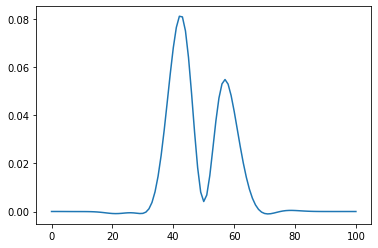

In [14]:
print(f'negativity {wigner_one.min()}')
plt.plot(wigner_one[:,51])

(25000, 15, 15)
projection operator prepared
0 0.12755684883965845
1 0.037238808936875
2 0.005859187137284491
3 0.0016570144169977367
4 0.000589693867424061
5 0.00025558084540851147
6 0.0001254962896790851
7 6.585968626858073e-05
8 3.643478525770675e-05
9 2.1458807402087114e-05
10 1.361959236125376e-05
11 9.361201500375844e-06
12 6.9301518897644926e-06
13 5.451356683553179e-06
14 4.483084910574737e-06
15 3.799666994098341e-06
16 3.284149282268155e-06
17 2.8746327475517245e-06
18 2.537287625012712e-06
19 2.252715603285242e-06
20 2.0090485065103854e-06
21 1.7984476403329553e-06
22 1.6153228779242352e-06
23 1.4554184373522843e-06
24 1.315334959547762e-06
25 1.1922706259681414e-06
26 1.0838725788609916e-06
27 9.881444275458984e-07
28 9.03383069070948e-07
29 8.281316536696551e-07
30 7.611422302461077e-07
31 7.013448486751613e-07
32 6.478214436737444e-07
33 5.997835492329197e-07
34 5.56553229713561e-07
35 5.175467729188601e-07
36 4.822607721999269e-07
37 4.502602742163982e-07
38 4.2116870623

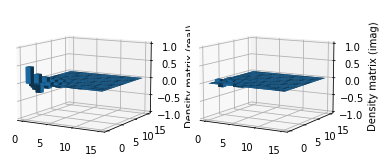

wavefunc instantiation end


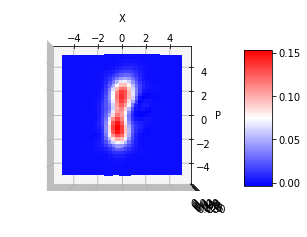

wavefunc instantiation end


In [37]:
#Tomography
quadratures = []
phases = []

q_files = """hd_two-4uW-28per-12ps-0deg20220809_121935.txt
hd_two-4uW-28per-12ps-22p5deg20220809_122039.txt
hd_two-4uW-28per-12ps-45deg20220809_122115.txt
hd_two-4uW-28per-12ps-67p5deg20220809_122149.txt
hd_two-4uW-28per-12ps-90deg20220809_122224.txt""".split()

# q_files = """hd_sq_4uw_0deg20220613_161823.txt
# hd_sq_4uw_30deg20220613_161859.txt
# hd_sq_4uw_60deg20220613_161924.txt
# hd_sq_4uw_90deg20220613_161956.txt""".split()


for q_filename, ph in zip(q_files, [90, 67.5, 45, 22.5, 0]):
    quad = np.loadtxt(q_filename)[:,1]
    quadratures += quad.tolist()
    phases += (ph*np.ones_like(quad)*np.pi/180.0).tolist()




shot = np.loadtxt('hd_shot-4uW-28per-12ps20220809_122308.txt')[:,0]

q_normalize = lambda quadratures, shot, hbar=1: (np.array(quadratures) - np.array(shot).mean())/np.array(shot).std() * np.sqrt(hbar/2)
quadratures = q_normalize(quadratures, shot).tolist()

rho_pp = maxlike(np.array(quadratures).ravel(), np.array(phases).ravel(), max_photon=14, conv_th=1e-15)

plot_bar3d_rho(rho_pp)
plt.show()

fig, ax = plot_wigner_rho(rho_pp)
plt.show()

ax.view_init(elev=0, azim = -90)
plt.show()

w_pp = Wigner_fock(rho_pp.shape[0]-1, 5, 0.01)
x = np.linspace(-5, 5, 101)
X,Y = np.meshgrid(x, x)
wigner_two = w_pp.wigner_rho(rho_pp, X, Y)
np.save("wigner_two.npy",wigner_two.real)

(10000, 15, 15)
projection operator prepared
0 0.11328237080055603
1 0.029846100909133703
2 0.004957710475970795
3 0.0014605174947304469
4 0.0005535172483143213
5 0.00025067252490534994
6 0.00012799772488558136
7 7.18053428977319e-05
8 4.407137338639014e-05
9 2.9550737765452598e-05
10 2.145547884729123e-05
11 1.66206626042812e-05
12 1.3512045500806111e-05
13 1.1363373291029392e-05
14 9.779340365850507e-06
15 8.549047207956368e-06
16 7.555380173540647e-06
17 6.730150082037763e-06
18 6.0314150410455104e-06
19 5.431786074103601e-06
20 4.912283485796601e-06
21 4.459026092670485e-06
22 4.0613997484277585e-06
23 3.7110053053418894e-06
24 3.401028557110799e-06
25 3.1258427242021116e-06
26 2.8807439395780395e-06
27 2.6617654740979488e-06
28 2.4655410032964667e-06
29 2.2891999629777578e-06
30 2.130285079017572e-06
31 1.9866859597149733e-06
32 1.8565848160734436e-06
33 1.7384116286751282e-06
34 1.630806847727077e-06
35 1.5325901986856615e-06
36 1.442734492803277e-06
37 1.360343572361702e-06
38 1

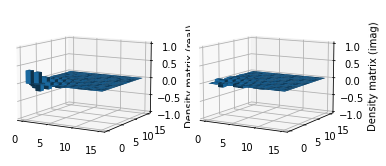

wavefunc instantiation end


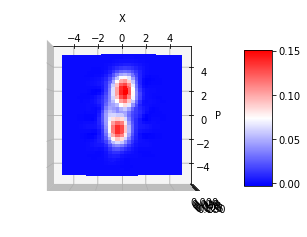

wavefunc instantiation end


In [38]:
#Tomography
quadratures = []
phases = []

q_files = """hd_three-4uW-28per-12ps-0deg20220809_124118.txt
hd_three-4uW-28per-12ps-22p5deg20220809_124241.txt
hd_three-4uW-28per-12ps-45deg20220809_124530.txt
hd_three-4uW-28per-12ps-67p5deg20220809_124642.txt
hd_three-4uW-28per-12ps-90deg20220809_124815.txt""".split()

# q_files = """hd_sq_4uw_0deg20220613_161823.txt
# hd_sq_4uw_30deg20220613_161859.txt
# hd_sq_4uw_60deg20220613_161924.txt
# hd_sq_4uw_90deg20220613_161956.txt""".split()


for q_filename, ph in zip(q_files, [90, 67.5, 45, 22.5, 0]):
    quad = np.loadtxt(q_filename)[:,1]
    quadratures += quad.tolist()
    phases += (ph*np.ones_like(quad)*np.pi/180.0).tolist()




shot = np.loadtxt('hd_shot-4uW-28per-12ps20220809_124941.txt')[:,0]

q_normalize = lambda quadratures, shot, hbar=1: (np.array(quadratures) - np.array(shot).mean())/np.array(shot).std() * np.sqrt(hbar/2)
quadratures = q_normalize(quadratures, shot).tolist()

rho_pp = maxlike(np.array(quadratures).ravel(), np.array(phases).ravel(), max_photon=14, conv_th=1e-15)

plot_bar3d_rho(rho_pp)
plt.show()

fig, ax = plot_wigner_rho(rho_pp)
plt.show()

ax.view_init(elev=0, azim = -90)
plt.show()

w_pp = Wigner_fock(rho_pp.shape[0]-1, 5, 0.01)
x = np.linspace(-5, 5, 101)
X,Y = np.meshgrid(x, x)
wigner_three = w_pp.wigner_rho(rho_pp, X, Y)
np.save("wigner_three.npy",wigner_three.real)

In [34]:
w_pp = Wigner_fock(rho_pp.shape[0]-1, 5, 0.01)
x = np.linspace(-5, 5, 101)
X,Y = np.meshgrid(x, x)
wigner_two = w_pp.wigner_rho(rho_pp, X, Y)
np.savetxt('wigner_two.csv', wigner_two)


wavefunc instantiation end


In [83]:
#Tomography
quadratures = []
phases = []

q_files = """hd_220mv_15uw_0deg20220613_173012.txt
hd_220mv_15uw_15deg20220613_173115.txt
hd_220mv_15uw_30deg20220613_173159.txt
hd_220mv_15uw_45deg20220613_173239.txt
hd_220mv_15uw_60deg20220613_173308.txt
hd_220mv_15uw_75deg20220613_173341.txt
hd_220mv_15uw_90deg20220613_173416.txt""".split()

for q_filename, ph in zip(q_files, [0,15,30,45,60,75,90]):
    quad = np.loadtxt(q_filename)[:,0]
    quadratures += quad.tolist()
    phases += (ph*np.ones_like(quad)*np.pi/180.0).tolist()




shot = np.loadtxt('hd_220mv_15uw_shot20220613_173502.txt')[:,0]

q_normalize = lambda quadratures, shot, hbar=1: (np.array(quadratures) - np.array(shot).mean())/np.array(shot).std() * np.sqrt(hbar/2)
quadratures = q_normalize(quadratures, shot).tolist()

rho_pp = maxlike(np.array(quadratures).ravel(), np.array(phases).ravel(), max_photon=20, conv_th=1e-15)

plot_bar3d_rho(rho_pp)
plt.show()

fig, ax = plot_wigner_rho(rho_pp)
plt.show()

ax.view_init(elev=0, azim = -90)
plt.show()

(17500, 21, 21)
projection operator prepared
0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan
1

KeyboardInterrupt: 

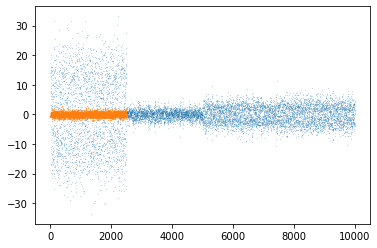

In [80]:
plt.scatter(range(len(quadratures)),quadratures,s=0.01)
plt.scatter(range(len(shot)),q_normalize(shot,shot),s=0.1)

In [6]:
print(np.min(wigner_one.real))

-0.0029530482105804244
